# OASIS INFOBYTE (TASK-1)  ----- IRIS FLOWER CLASSIFICATION

### IMPORTING PACKAGES

In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### READING DATASET

In [38]:
df=pd.read_csv('Iris.csv')

### PREPROCESSING

In [39]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [41]:
df.shape

(150, 6)

In [42]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [43]:
df.duplicated().sum()

0

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

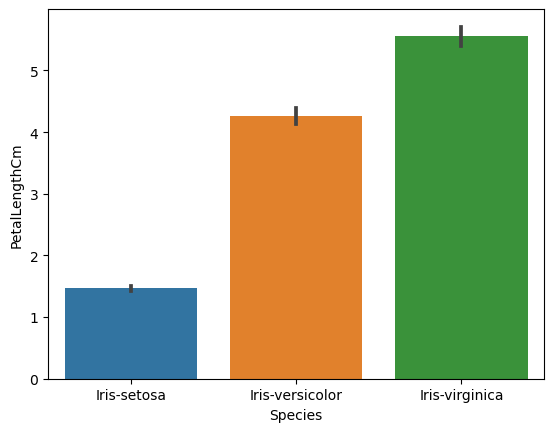

In [47]:
sns.barplot(x='Species',y='PetalLengthCm',data=df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

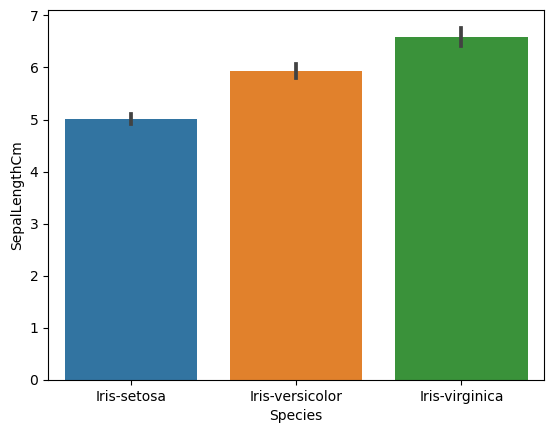

In [49]:
sns.barplot(x='Species',y='SepalLengthCm',data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

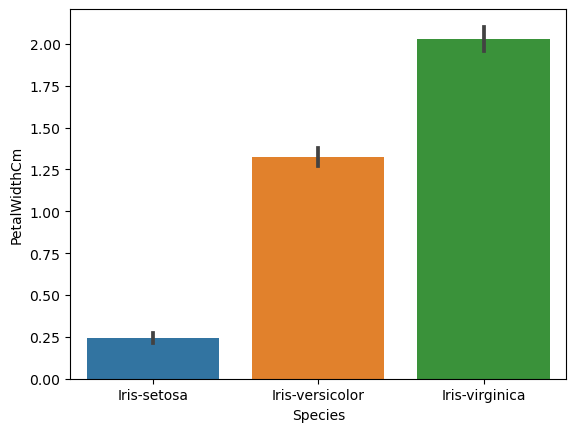

In [50]:
sns.barplot(x='Species',y='PetalWidthCm',data=df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

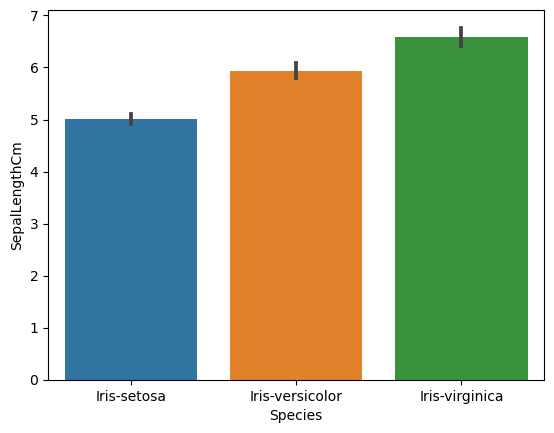

In [51]:
sns.barplot(x='Species',y='SepalLengthCm',data=df)

<Axes: >

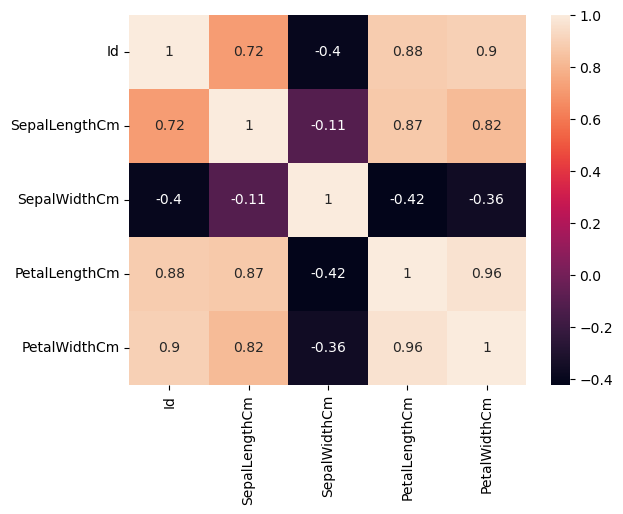

In [52]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

### CONVERSION INTO NUMERIC ENTITY

In [53]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [54]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

### SPLITTING INTO TRAINING SET AND TESTING SET

In [55]:
from sklearn.model_selection import train_test_split
x=df.drop(['Species'],axis=1)
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.9)

### MODEL DEVELOPMENT

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [57]:
svc = SVC()
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [58]:
algos={
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'BC':bc,
    'ETC':etc
}

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [60]:
pre_acc = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc[name] = {
        'Precision': precision_score(y_test, y_pred,average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [61]:
pre_acc

{'SVC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'KNC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'LR': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'DTC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'RFC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'ABC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'BC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'ETC': 

In [62]:
'''
Lets normalize the values and see if anything works
'''
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [63]:
pre_acc_2 = {}
for name,algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    pre_acc_2[name] = {
        'Precision': precision_score(y_test, y_pred,average='weighted'),
        'Accuracy': accuracy_score(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

In [64]:
pre_acc_2

{'SVC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'KNC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'LR': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'DTC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'RFC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'ABC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'BC': {'Precision': 1.0,
  'Accuracy': 1.0,
  'Confusion Matrix': array([[6, 0, 0],
         [0, 6, 0],
         [0, 0, 3]], dtype=int64)},
 'ETC': 

### SAVING MODEL

In [66]:
import joblib as jb

In [67]:
jb.dump(pre_acc, 'iris_flower_classification')

['iris_flower_classification']

In [68]:
pre_acc = jb.load('iris_flower_classification')

In [69]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')